In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(r'C:\Users\Shrey\OneDrive\Desktop\data mining\titanic\train.csv')


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [25]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree accuracy: 0.8182035026049841


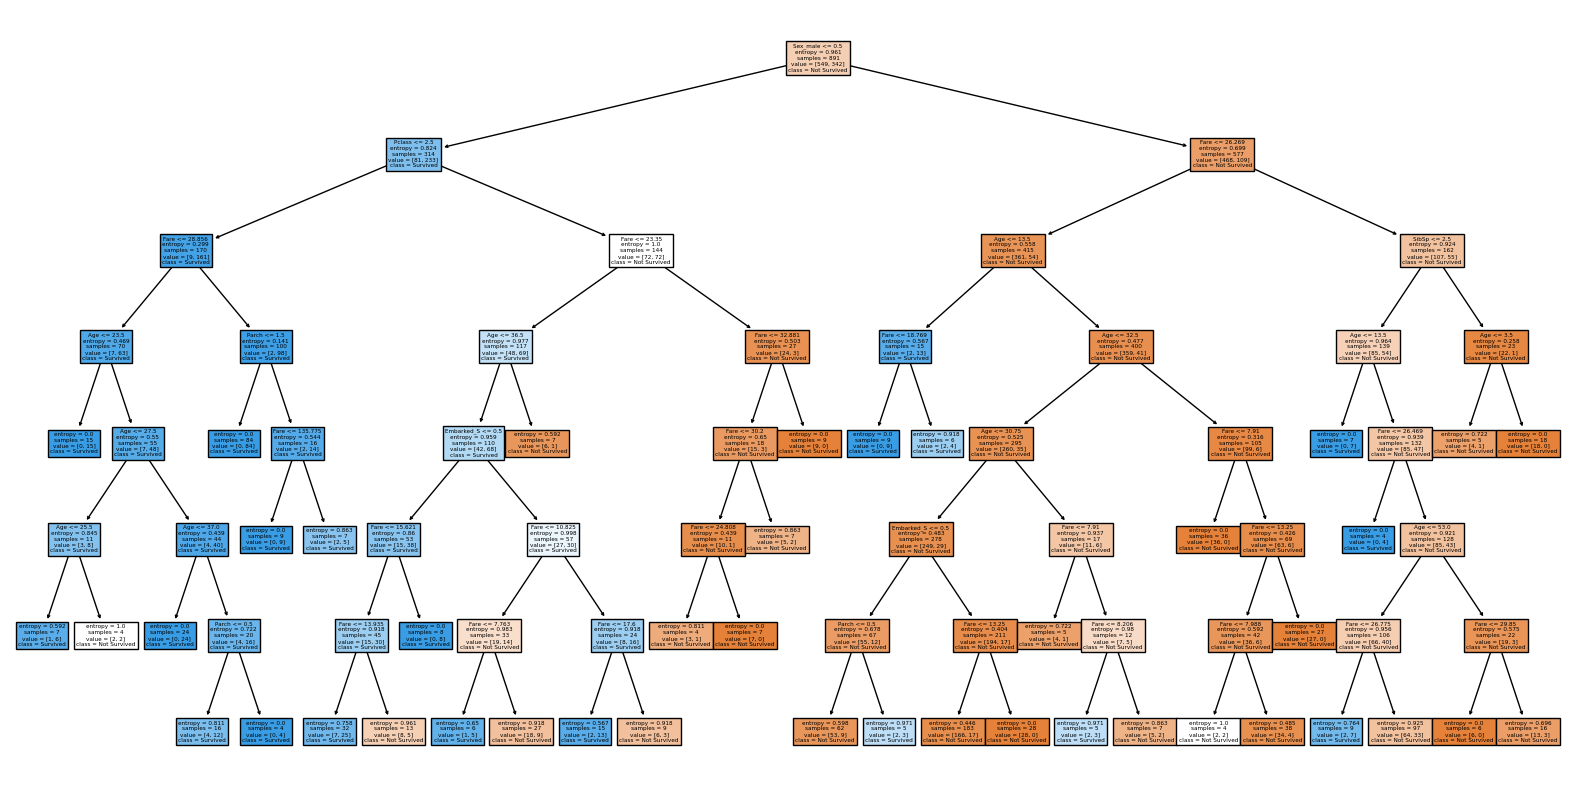

In [32]:
best_dt_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best Decision Tree accuracy:", grid_search.best_score_)

plt.figure(figsize=(20, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])

plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy Scores:", cv_scores_dt)
print("Average Decision Tree Cross-Validation Accuracy:", cv_scores_dt.mean())


Decision Tree Cross-Validation Accuracy Scores: [0.79888268 0.81460674 0.84269663 0.80337079 0.83146067]
Average Decision Tree Cross-Validation Accuracy: 0.8182035026049841


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

In [29]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [30]:
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Random Forest accuracy:", grid_search_rf.best_score_)
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Average Random Forest Cross-Validation Accuracy:", cv_scores_rf.mean())

Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest accuracy: 0.8339087314041805
Random Forest Cross-Validation Accuracy Scores: [0.82122905 0.80898876 0.87078652 0.81460674 0.85393258]
Average Random Forest Cross-Validation Accuracy: 0.8339087314041805
